# **Periodo 1**

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
data = pd.read_excel("/content/drive/MyDrive/Modelos de inventarios.xlsx",sheet_name="M_dinamico_con_preparacion")
data

,periodo1,periodo2,periodo3,D1,D2,D3,K1,K2,K3,h1,h2,h3,x,c.primeras_uni,c.proximas_uni,uni_de_primer_c.,periodo.1,periodo.2,periodo.3,inventario
0,1,2,3,6,4,7,12,14,12,1.33,0.19,1.42,6,18,25,9,0,11,0,124.92
1,1,2,3,5,6,6,7,6,9,1.17,0.93,2.22,4,12,27,8,9,0,4,146.56
2,1,2,3,5,3,8,10,13,14,0.93,0.56,1.34,2,15,32,3,3,3,8,335.86
3,1,2,3,5,4,6,9,11,4,2.77,1.31,1.94,5,10,28,4,2,4,4,144.35
4,1,2,3,5,8,8,14,9,8,0.83,0.52,0.31,2,15,26,2,15,2,2,479.76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1,2,3,5,7,8,11,2,10,1.55,0.89,2.53,9,15,30,3,3,3,5,245.77
96,1,2,3,8,3,9,11,6,6,1.49,2.41,2.79,5,19,32,2,4,2,9,460.86
97,1,2,3,8,8,4,3,11,14,2.93,1.16,2.99,3,19,26,5,6,7,6,276.95
98,1,2,3,2,9,3,2,12,3,1.88,2.70,1.34,3,19,31,2,2,7,2,313.08


In [ ]:
data = data.dropna()

In [ ]:
features = np.asarray(data[["D1",	"D2",	"D3",	"K1",	"K2",	"K3",	"h1",	"h2",	"h3",	"x",	"c.primeras_uni",	"c.proximas_uni",	"uni_de_primer_c."]])
targets = np.asarray(data["periodo.1"])

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import KFold
k = 5
kf = KFold(n_splits = k, shuffle = True)
d_tree = DecisionTreeRegressor(max_depth= 50)

In [ ]:
# declarar un array para los precios predichos en cada iteración

all_predictions = np.zeros_like(targets)

for train_indices, test_indices in kf.split(features):
  train_features, test_features = features[train_indices], features[test_indices]
  train_targets, test_targets = targets[train_indices] , targets[test_indices]

  ## Entrenar el decision tree
  d_tree.fit(train_features,train_targets)

  ## Predecir usando el modelo
  predictions = d_tree.predict(test_features)

  ## Ponemos las predicciones en el array de all_predictions creado above
  all_predictions[test_indices] = predictions


## Evaluamos el modelo usando la diferencia de medianas de todas las predicciones realizadas
eval_model = np.median(np.abs(all_predictions - targets))
eval_model

1.0

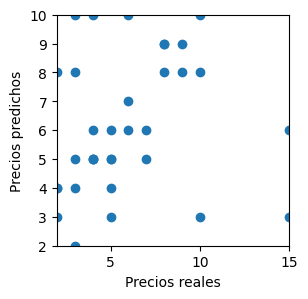

In [ ]:
from matplotlib import pyplot as plt
plt.figure(figsize = (3,3))
plt.scatter(targets, all_predictions)
plt.xlim(2,targets.max())
plt.ylim(2,predictions.max())
plt.xlabel("Precios reales")
plt.ylabel("Precios predichos")
plt.show()

In [ ]:
test_features

array([[ 6.  ,  7.  ,  5.  ,  8.  ,  2.  ,  2.  ,  0.18,  1.75,  0.83,
         8.  , 11.  , 25.  ,  8.  ],
       [ 3.  ,  3.  ,  3.  ,  1.  , 13.  ,  5.  ,  2.81,  0.79,  1.34,
         2.  , 17.  , 32.  ,  7.  ],
       [ 7.  ,  2.  ,  9.  , 14.  ,  2.  , 11.  ,  1.8 ,  1.66,  2.29,
         7.  , 14.  , 30.  ,  1.  ],
       [ 5.  ,  1.  ,  2.  ,  7.  ,  9.  , 11.  ,  0.76,  2.22,  0.66,
         6.  , 19.  , 30.  ,  1.  ],
       [ 1.  ,  5.  ,  6.  , 13.  ,  3.  ,  4.  ,  0.74,  2.72,  1.33,
         8.  , 19.  , 32.  ,  4.  ],
       [ 6.  ,  2.  ,  6.  ,  6.  , 13.  ,  3.  ,  1.76,  2.37,  2.66,
         8.  , 17.  , 30.  ,  7.  ],
       [ 8.  ,  9.  ,  9.  ,  9.  ,  4.  , 11.  ,  3.  ,  2.18,  0.78,
         2.  , 13.  , 32.  ,  7.  ],
       [ 7.  ,  6.  ,  7.  , 14.  , 12.  ,  1.  ,  2.45,  0.56,  0.26,
         5.  , 10.  , 28.  ,  7.  ],
       [ 3.  ,  6.  ,  1.  ,  8.  , 14.  , 10.  ,  2.51,  2.82,  1.85,
         1.  , 13.  , 31.  ,  4.  ],
       [ 3.  ,  6.  ,  5.  ,

In [ ]:
cop = d_tree.predict([[6,	4,	7,	12,	14,	12,	1.33,	0.19,	1.42,	6	,18,	25,	9	]])

In [ ]:
cop

array([0.])

# **Periodo 2**

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
data = pd.read_excel("/content/drive/MyDrive/Modelos de inventarios.xlsx",sheet_name="M_dinamico_con_preparacion")
data

,periodo1,periodo2,periodo3,D1,D2,D3,K1,K2,K3,h1,h2,h3,x,c.primeras_uni,c.proximas_uni,uni_de_primer_c.,periodo.1,periodo.2,periodo.3,inventario
0,1,2,3,6,4,7,12,14,12,1.33,0.19,1.42,6,18,25,9,0,11,0,124.92
1,1,2,3,5,6,6,7,6,9,1.17,0.93,2.22,4,12,27,8,9,0,4,146.56
2,1,2,3,5,3,8,10,13,14,0.93,0.56,1.34,2,15,32,3,3,3,8,335.86
3,1,2,3,5,4,6,9,11,4,2.77,1.31,1.94,5,10,28,4,2,4,4,144.35
4,1,2,3,5,8,8,14,9,8,0.83,0.52,0.31,2,15,26,2,15,2,2,479.76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1,2,3,5,7,8,11,2,10,1.55,0.89,2.53,9,15,30,3,3,3,5,245.77
96,1,2,3,8,3,9,11,6,6,1.49,2.41,2.79,5,19,32,2,4,2,9,460.86
97,1,2,3,8,8,4,3,11,14,2.93,1.16,2.99,3,19,26,5,6,7,6,276.95
98,1,2,3,2,9,3,2,12,3,1.88,2.70,1.34,3,19,31,2,2,7,2,313.08


In [ ]:
data = data.dropna()

In [ ]:
features = np.asarray(data[["D1",	"D2",	"D3",	"K1",	"K2",	"K3",	"h1",
                            "h2",	"h3",	"x",	"c.primeras_uni",
                            "c.proximas_uni",	"uni_de_primer_c.","periodo.1"]])
targets = np.asarray(data["periodo.2"])

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import KFold
k = 5
kf = KFold(n_splits = k, shuffle = True)
d_tree = DecisionTreeRegressor(max_depth= 50)

In [ ]:
# declarar un array para los precios predichos en cada iteración

all_predictions = np.zeros_like(targets)

for train_indices, test_indices in kf.split(features):
  train_features, test_features = features[train_indices], features[test_indices]
  train_targets, test_targets = targets[train_indices] , targets[test_indices]

  ## Entrenar el decision tree
  d_tree.fit(train_features,train_targets)

  ## Predecir usando el modelo
  predictions = d_tree.predict(test_features)

  ## Ponemos las predicciones en el array de all_predictions creado above
  all_predictions[test_indices] = predictions


## Evaluamos el modelo usando la diferencia de medianas de todas las predicciones realizadas
eval_model = np.median(np.abs(all_predictions - targets))
eval_model

1.0

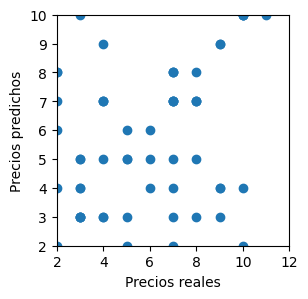

In [ ]:
from matplotlib import pyplot as plt
plt.figure(figsize = (3,3))
plt.scatter(targets, all_predictions)
plt.xlim(2,targets.max())
plt.ylim(2,predictions.max())
plt.xlabel("Precios reales")
plt.ylabel("Precios predichos")
plt.show()

In [ ]:
test_features

array([[ 5.  ,  8.  ,  8.  , 14.  ,  9.  ,  8.  ,  0.83,  0.52,  0.31,
         2.  , 15.  , 26.  ,  2.  , 15.  ],
       [ 2.  ,  6.  ,  5.  ,  8.  , 10.  ,  7.  ,  0.44,  2.7 ,  1.45,
         2.  , 16.  , 25.  ,  1.  ,  0.  ],
       [ 7.  ,  8.  ,  7.  ,  3.  , 14.  ,  5.  ,  1.13,  1.71,  2.2 ,
         1.  , 15.  , 28.  ,  8.  ,  9.  ],
       [ 3.  ,  4.  ,  9.  , 14.  , 13.  ,  2.  ,  2.46,  0.92,  1.05,
         3.  , 15.  , 30.  ,  9.  ,  0.  ],
       [ 7.  ,  5.  ,  5.  ,  7.  , 11.  ,  9.  ,  0.78,  0.51,  2.09,
         6.  , 17.  , 32.  ,  6.  ,  7.  ],
       [ 4.  ,  5.  ,  3.  , 12.  ,  3.  ,  6.  ,  0.88,  2.53,  0.64,
         9.  , 11.  , 32.  ,  8.  ,  0.  ],
       [ 9.  ,  9.  ,  1.  ,  3.  ,  2.  , 12.  ,  1.71,  2.97,  2.36,
         6.  , 12.  , 29.  ,  9.  ,  3.  ],
       [ 1.  ,  7.  ,  5.  , 13.  ,  7.  ,  2.  ,  2.75,  2.66,  1.7 ,
         8.  , 18.  , 27.  ,  7.  ,  0.  ],
       [ 1.  ,  7.  ,  5.  , 13.  ,  7.  ,  2.  ,  2.75,  2.66,  1.7 ,
         

In [ ]:
cop = d_tree.predict([[6,	4,	7,	12,	14,	12,	1.33,	0.19,	1.42,	6	,18,	25,	9,0	]])

In [ ]:
cop

array([11.])

# **Periodo 3**

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
data = pd.read_excel("/content/drive/MyDrive/Modelos de inventarios.xlsx",sheet_name="M_dinamico_con_preparacion")
data

,periodo1,periodo2,periodo3,D1,D2,D3,K1,K2,K3,h1,h2,h3,x,c.primeras_uni,c.proximas_uni,uni_de_primer_c.,periodo.1,periodo.2,periodo.3,inventario
0,1,2,3,6,4,7,12,14,12,1.33,0.19,1.42,6,18,25,9,0,11,0,124.92
1,1,2,3,5,6,6,7,6,9,1.17,0.93,2.22,4,12,27,8,9,0,4,146.56
2,1,2,3,5,3,8,10,13,14,0.93,0.56,1.34,2,15,32,3,3,3,8,335.86
3,1,2,3,5,4,6,9,11,4,2.77,1.31,1.94,5,10,28,4,2,4,4,144.35
4,1,2,3,5,8,8,14,9,8,0.83,0.52,0.31,2,15,26,2,15,2,2,479.76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1,2,3,5,7,8,11,2,10,1.55,0.89,2.53,9,15,30,3,3,3,5,245.77
96,1,2,3,8,3,9,11,6,6,1.49,2.41,2.79,5,19,32,2,4,2,9,460.86
97,1,2,3,8,8,4,3,11,14,2.93,1.16,2.99,3,19,26,5,6,7,6,276.95
98,1,2,3,2,9,3,2,12,3,1.88,2.70,1.34,3,19,31,2,2,7,2,313.08


In [ ]:
data = data.dropna()

In [ ]:
features = np.asarray(data[["D1",	"D2",	"D3",	"K1",	"K2",	"K3",	"h1",
                            "h2",	"h3",	"x",	"c.primeras_uni",
                            "c.proximas_uni",	"uni_de_primer_c.","periodo.1","periodo.2"]])
targets = np.asarray(data["periodo.3"])

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import KFold
k = 5
kf = KFold(n_splits = k, shuffle = True)
d_tree = DecisionTreeRegressor(max_depth= 50)

In [ ]:
# declarar un array para los precios predichos en cada iteración

all_predictions = np.zeros_like(targets)

for train_indices, test_indices in kf.split(features):
  train_features, test_features = features[train_indices], features[test_indices]
  train_targets, test_targets = targets[train_indices] , targets[test_indices]

  ## Entrenar el decision tree
  d_tree.fit(train_features,train_targets)

  ## Predecir usando el modelo
  predictions = d_tree.predict(test_features)

  ## Ponemos las predicciones en el array de all_predictions creado above
  all_predictions[test_indices] = predictions


## Evaluamos el modelo usando la diferencia de medianas de todas las predicciones realizadas
eval_model = np.median(np.abs(all_predictions - targets))
eval_model

2.0

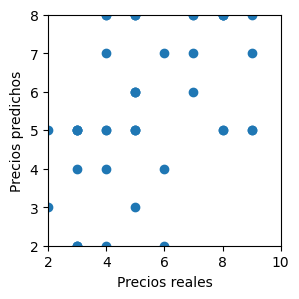

In [ ]:
from matplotlib import pyplot as plt
plt.figure(figsize = (3,3))
plt.scatter(targets, all_predictions)
plt.xlim(2,targets.max())
plt.ylim(2,predictions.max())
plt.xlabel("Precios reales")
plt.ylabel("Precios predichos")
plt.show()

In [ ]:
test_features

array([[ 7.  ,  8.  ,  7.  ,  3.  , 14.  ,  5.  ,  1.13,  1.71,  2.2 ,
         1.  , 15.  , 28.  ,  8.  ,  9.  ,  9.  ],
       [ 3.  ,  4.  ,  9.  , 14.  , 13.  ,  2.  ,  2.46,  0.92,  1.05,
         3.  , 15.  , 30.  ,  9.  ,  0.  , 10.  ],
       [ 9.  ,  6.  ,  6.  ,  1.  ,  9.  , 11.  ,  0.53,  0.24,  2.86,
         4.  , 11.  , 28.  ,  1.  , 15.  ,  1.  ],
       [ 3.  ,  3.  ,  3.  ,  1.  , 13.  ,  5.  ,  2.81,  0.79,  1.34,
         2.  , 17.  , 32.  ,  7.  ,  8.  ,  0.  ],
       [ 9.  ,  7.  ,  4.  ,  5.  ,  9.  ,  4.  ,  1.04,  1.56,  0.58,
         4.  , 13.  , 30.  ,  5.  ,  6.  ,  6.  ],
       [ 6.  ,  7.  ,  5.  , 13.  ,  3.  ,  3.  ,  1.19,  1.11,  1.24,
         1.  , 16.  , 27.  ,  1.  , 15.  ,  1.  ],
       [ 1.  ,  7.  ,  5.  , 13.  ,  7.  ,  2.  ,  2.75,  2.66,  1.7 ,
         8.  , 18.  , 27.  ,  7.  ,  0.  ,  0.  ],
       [ 2.  ,  8.  ,  9.  , 14.  , 10.  ,  1.  ,  0.27,  1.22,  0.51,
         4.  , 12.  , 34.  ,  7.  ,  0.  ,  8.  ],
       [ 4.  ,  7.  ,  1

In [ ]:
cop = d_tree.predict([[6,	4,	7,	12,	14,	12,	1.33,	0.19,	1.42,	6	,18,	25,	9,0,11	]])

In [ ]:
cop

array([0.])

# **C.inventario**

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
data = pd.read_excel("/content/drive/MyDrive/Modelos de inventarios.xlsx",sheet_name="M_dinamico_con_preparacion")
data

,periodo1,periodo2,periodo3,D1,D2,D3,K1,K2,K3,h1,h2,h3,x,c.primeras_uni,c.proximas_uni,uni_de_primer_c.,periodo.1,periodo.2,periodo.3,inventario
0,1,2,3,6,4,7,12,14,12,1.33,0.19,1.42,6,18,25,9,0,11,0,124.92
1,1,2,3,5,6,6,7,6,9,1.17,0.93,2.22,4,12,27,8,9,0,4,146.56
2,1,2,3,5,3,8,10,13,14,0.93,0.56,1.34,2,15,32,3,3,3,8,335.86
3,1,2,3,5,4,6,9,11,4,2.77,1.31,1.94,5,10,28,4,2,4,4,144.35
4,1,2,3,5,8,8,14,9,8,0.83,0.52,0.31,2,15,26,2,15,2,2,479.76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1,2,3,5,7,8,11,2,10,1.55,0.89,2.53,9,15,30,3,3,3,5,245.77
96,1,2,3,8,3,9,11,6,6,1.49,2.41,2.79,5,19,32,2,4,2,9,460.86
97,1,2,3,8,8,4,3,11,14,2.93,1.16,2.99,3,19,26,5,6,7,6,276.95
98,1,2,3,2,9,3,2,12,3,1.88,2.70,1.34,3,19,31,2,2,7,2,313.08


In [ ]:
data = data.dropna()

In [ ]:
features = np.asarray(data[["D1",	"D2",	"D3",	"K1",	"K2",	"K3",	"h1",
                            "h2",	"h3",	"x",	"c.primeras_uni",
                            "c.proximas_uni",	"uni_de_primer_c.","periodo.1",
                            "periodo.2","periodo.3"]])
targets = np.asarray(data["inventario"])

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import KFold
k = 5
kf = KFold(n_splits = k, shuffle = True)
d_tree = DecisionTreeRegressor(max_depth= 50)

In [ ]:
# declarar un array para los precios predichos en cada iteración

all_predictions = np.zeros_like(targets)

for train_indices, test_indices in kf.split(features):
  train_features, test_features = features[train_indices], features[test_indices]
  train_targets, test_targets = targets[train_indices] , targets[test_indices]

  ## Entrenar el decision tree
  d_tree.fit(train_features,train_targets)

  ## Predecir usando el modelo
  predictions = d_tree.predict(test_features)

  ## Ponemos las predicciones en el array de all_predictions creado above
  all_predictions[test_indices] = predictions


## Evaluamos el modelo usando la diferencia de medianas de todas las predicciones realizadas
eval_model = np.median(np.abs(all_predictions - targets))
eval_model

37.515

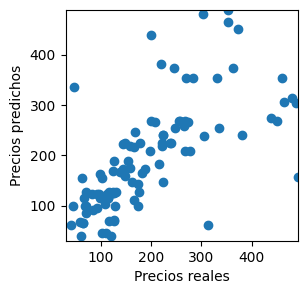

In [ ]:
from matplotlib import pyplot as plt
plt.figure(figsize = (3,3))
plt.scatter(targets, all_predictions)
plt.xlim(30,targets.max())
plt.ylim(30,predictions.max())
plt.xlabel("Precios reales")
plt.ylabel("Precios predichos")
plt.show()

In [ ]:
test_features

array([[ 5.  ,  6.  ,  6.  ,  7.  ,  6.  ,  9.  ,  1.17,  0.93,  2.22,
         4.  , 12.  , 27.  ,  8.  ,  9.  ,  0.  ,  4.  ],
       [ 5.  ,  8.  ,  8.  , 14.  ,  9.  ,  8.  ,  0.83,  0.52,  0.31,
         2.  , 15.  , 26.  ,  2.  , 15.  ,  2.  ,  2.  ],
       [ 6.  ,  9.  ,  7.  , 10.  , 10.  ,  9.  ,  1.54,  1.76,  0.36,
         2.  , 18.  , 33.  ,  4.  ,  5.  ,  8.  ,  7.  ],
       [ 9.  ,  4.  ,  2.  ,  7.  , 11.  ,  3.  ,  2.9 ,  2.15,  1.54,
         2.  , 17.  , 32.  ,  9.  , 10.  ,  1.  ,  2.  ],
       [ 6.  ,  3.  ,  9.  ,  5.  ,  5.  ,  3.  ,  0.38,  2.86,  0.27,
         6.  , 17.  , 27.  ,  9.  ,  0.  , 10.  ,  2.  ],
       [ 3.  ,  5.  ,  3.  ,  3.  , 12.  ,  7.  ,  2.1 ,  2.79,  1.73,
         6.  , 18.  , 31.  ,  7.  ,  0.  ,  8.  ,  0.  ],
       [ 6.  ,  2.  ,  1.  , 12.  ,  1.  , 10.  ,  2.54,  2.58,  2.63,
         8.  , 11.  , 29.  ,  5.  ,  0.  ,  1.  ,  0.  ],
       [ 9.  ,  7.  ,  4.  ,  5.  ,  9.  ,  4.  ,  1.04,  1.56,  0.58,
         4.  , 13.  , 30. 

In [ ]:
cop = d_tree.predict([[6,	4,	7,	12,	14,	12,	1.33,	0.19,	1.42,	6	,18,	25,	9,0,11,0	]])

In [ ]:
cop

array([124.92])